In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from wordcloud import WordCloud

In [4]:
df=pd.read_csv("datanlp.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000
mean,0.100681,0.010052,0.053988,0.003729,0.052691,0.009565
std,0.300930,0.099762,0.226013,0.060956,0.223435,0.097342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Visualization

In [6]:
'''[!]Important:  Dropped useless columns'''
df.drop(['id'],axis=1,inplace=True)
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


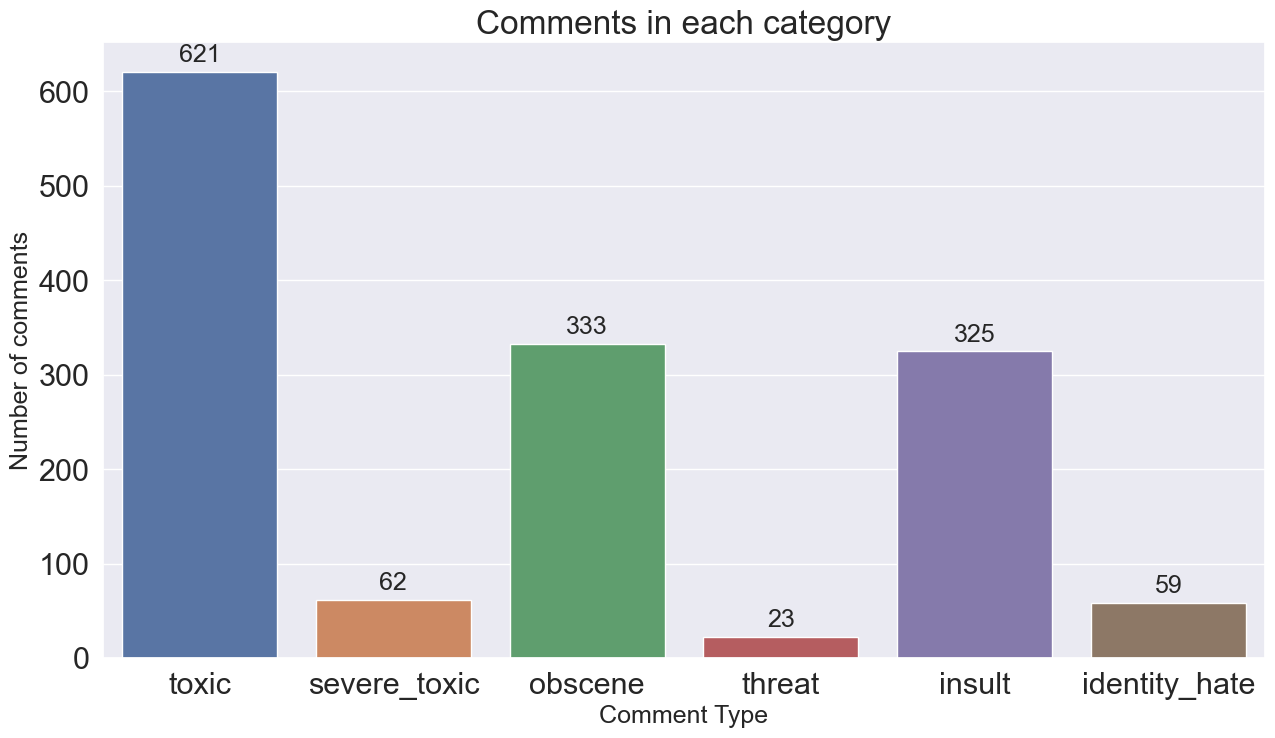

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

categories = list(df.iloc[:,1:].columns.values)
sns.set(font_scale=2)
plt.figure(figsize=(15,8))
ax = sns.barplot(categories, df.iloc[:,1:].sum().values)
plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type', fontsize=18)

# Adding the text labels
rects = ax.patches
labels = df.iloc[:,1:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=18)

plt.show()


**Observation:**
As we can see that some of labels are very less, this might be a problem for overfitting.

In [6]:
#pip install wordcloud

In [8]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(40,25))
subset = df[df['toxic']>0]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)

**Observation:** 
- These are the most common words used in toxic chats.

## Data Preprocessing

In [8]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
from bs4 import BeautifulSoup
warnings.filterwarnings("ignore")

In [9]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### Data Cleaning
we clean the text by removing various tags, stopwords, special char and converting them to lowercase

In [10]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

def decontracted(phrase):
    # Specific contractions
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can't", "can not", phrase)
    # General contractions
    phrase = re.sub(r"n't", " not", phrase)
    phrase = re.sub(r"'re", " are", phrase)
    phrase = re.sub(r"'s", " is", phrase)
    phrase = re.sub(r"'d", " would", phrase)
    phrase = re.sub(r"'ll", " will", phrase)
    phrase = re.sub(r"'t", " not", phrase)
    phrase = re.sub(r"'ve", " have", phrase)
    phrase = re.sub(r"'m", " am", phrase)
    return phrase

def cleanPunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]', '', sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]', ' ', cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n", " ")
    return cleaned

def clear_sentence(sentence):
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = BeautifulSoup(sentence, 'lxml').get_text()
    sentence = decontracted(sentence)
    sentence = cleanPunc(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    stop_words = set(stopwords.words('english'))
    stop_words.update(['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'may', 'also', 'across', 'among', 'beside', 'however', 'yet', 'within'])
    sentence = ' '.join(e.lower() for e in sentence.split() if e.lower() not in stop_words)
    return sentence.strip()


In [11]:
from tqdm import tqdm
preprocessed_text = []
for sentance in tqdm(df['comment_text'].values):
    preprocessed_text.append(clear_sentence(sentance))


100%|██████████| 6168/6168 [00:42<00:00, 146.84it/s]


In [12]:
print(preprocessed_text[0])

explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since retired


In [13]:
df['preprocessed_text']=preprocessed_text
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,preprocessed_text
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww matches background colour seemingly stuck...
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,make real suggestions improvement wondered sec...
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page


In [14]:
df.drop(['comment_text'],axis=1,inplace=True)
df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,preprocessed_text
0,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,0,0,0,0,0,0,daww matches background colour seemingly stuck...
2,0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,0,0,0,0,0,0,make real suggestions improvement wondered sec...
4,0,0,0,0,0,0,sir hero chance remember page


In [15]:
df[df['toxic']==1].head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,preprocessed_text
6,1,1,1,0,1,0,cocksucker piss around work
12,1,0,0,0,0,0,hey talk exclusive group wp talibans good dest...
16,1,0,0,0,0,0,bye look come think comming back tosser
42,1,0,1,0,1,1,gay antisemmitian archangel white tiger meow g...
43,1,0,1,0,1,0,fuck filthy mother ass dry


In [16]:
df.to_csv('preprocessed_text.csv',index=False)
df=pd.read_csv('preprocessed_text.csv')
df.dropna(axis=0,inplace=True)
df.isna().sum()

toxic                0
severe_toxic         0
obscene              0
threat               0
insult               0
identity_hate        0
preprocessed_text    0
dtype: int64

In [17]:
df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,preprocessed_text
0,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,0,0,0,0,0,0,daww matches background colour seemingly stuck...
2,0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,0,0,0,0,0,0,make real suggestions improvement wondered sec...
4,0,0,0,0,0,0,sir hero chance remember page


In [18]:
df.to_csv('preprocessed_text.csv',index=False)

## Model: LSTM
this is a lstm model for multi label prediction.
a deep learning model for text classification.

In [19]:
#pip install keras

In [20]:
#pip install tensorflow

In [21]:
import tensorflow as tf
print(tf.__version__)
from keras import backend as K

config = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=4,
    inter_op_parallelism_threads=4
)
sess = tf.compat.v1.Session(config=config)
K.set_session(sess)


2.12.0


In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

import codecs
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
import pickle
from bs4 import BeautifulSoup
warnings.filterwarnings("ignore")

### Load and split data

In [23]:
df=pd.read_csv('preprocessed_text.csv')
df.head()


,toxic,severe_toxic,obscene,threat,insult,identity_hate,preprocessed_text
0,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,0,0,0,0,0,0,daww matches background colour seemingly stuck...
2,0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,0,0,0,0,0,0,make real suggestions improvement wondered sec...
4,0,0,0,0,0,0,sir hero chance remember page


In [24]:
df[df['threat']==1].head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,preprocessed_text
78,1,0,0,1,0,0,hi back last warning stop undoing edits die
175,1,0,1,1,1,1,think fagget get oife burn hell hate sorry can...
598,1,0,0,1,0,0,sock puppet account suprise sincerely man trac...
800,1,0,1,1,1,0,fuck smith please notified die want dance grave
1015,1,1,1,1,1,1,wouldnt first time bitch fuck ill find live so...


In [25]:
print(df.columns)

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate',
       'preprocessed_text'],
      dtype='object')


In [26]:
train,test=train_test_split(df,test_size=0.2)
train.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,preprocessed_text
937,0,0,0,0,0,0,feather citation quill looked past therefore o...
23,0,0,0,0,0,0,signpost september read signpost full single p...
1883,0,0,0,0,0,0,called demographic prediction combined conspir...
3409,0,0,0,0,0,0,see makes blum reliable people like chomsky he...
872,0,0,0,0,0,0,please sign comments thanks


# Tokenization of words for LSTM

In [27]:
MAX_SEQUENCE_LENGTH = 400
MAX_NB_WORDS = 50000
 

In [28]:
tokenizer = Tokenizer(lower=False, filters='', num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train['preprocessed_text'])

In [29]:
train_sequences = tokenizer.texts_to_sequences(train['preprocessed_text'])
test_sequences = tokenizer.texts_to_sequences(test['preprocessed_text'])


In [30]:
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)


In [31]:
nb_words = len(tokenizer.word_index) + 1


In [32]:
print('Shape of train data tensor:', train_data.shape)


Shape of train data tensor: (4920, 400)


In [33]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [34]:
print(nb_words)

22201


## Model Building

In [35]:
from keras.layers import LSTM

inp = Input(shape=(MAX_SEQUENCE_LENGTH,))
embed_size = 300
x = Embedding(nb_words, embed_size)(inp)
output_dimension = 128
x = LSTM(output_dimension, return_sequences=True, name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.3)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(6, activation="sigmoid")(x)

model = Model(inputs=inp, outputs=x)
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

labels = ['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']
y = train[labels].values

batch_size = 32
epochs = 10

model.fit(train_data, y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

pred = model.predict(test_data)
pred[:10]


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400)]             0         
                                                                 
 embedding (Embedding)       (None, 400, 300)          6660300   
                                                                 
 lstm_layer (LSTM)           (None, 400, 128)          219648    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 50)                6450      
                                                             

array([[3.9611623e-11, 4.9171189e-07, 2.2203871e-08, 5.9716634e-11,
        4.4253179e-09, 9.9415104e-07],
       [2.1287300e-07, 1.1350140e-04, 1.4347654e-05, 1.4637389e-07,
        3.0046679e-06, 9.8397699e-04],
       [3.4489159e-07, 1.1447934e-04, 1.1925137e-05, 2.9862827e-07,
        9.8149858e-06, 5.8586954e-04],
       [1.3263697e-08, 1.7539269e-05, 1.1479428e-06, 9.2500914e-09,
        5.2953391e-07, 2.0262093e-04],
       [3.6975953e-10, 1.9263648e-06, 8.7566285e-08, 3.6736308e-10,
        3.0351874e-08, 9.7086167e-06],
       [1.2063645e-10, 1.0858394e-06, 5.4797269e-08, 1.7082080e-10,
        8.9392174e-09, 2.5263416e-06],
       [6.5485645e-11, 6.4667097e-07, 2.6584592e-08, 7.4530500e-11,
        7.7874711e-09, 2.3896991e-06],
       [1.0173504e-09, 3.3742833e-06, 1.5901074e-07, 8.3667245e-10,
        9.0060155e-08, 2.6976273e-05],
       [2.5211513e-10, 1.7304685e-06, 9.3129401e-08, 3.5939290e-10,
        1.6624478e-08, 4.0624041e-06],
       [5.8903481e-12, 1.7432481e-07,

#### saving the model

In [36]:
model.save('LSTM_toxic_prediction_model2.h5') 

In [47]:
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

def tokenize(sentence):
    MAX_SEQUENCE_LENGTH = 400
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)
    test_sequences = tokenizer.texts_to_sequences([sentence])
    test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
    return test_data

def model_predict(test_data):
    model = load_model('LSTM_toxic_prediction_model2.h5')
    prediction = model.predict(test_data)
    return prediction

def get_prediction(sentence):
    clear_text = clear_sentence(sentence)  # Assuming clear_sentence is defined
    test_data = tokenize(clear_text)
    predicted_array = model_predict(test_data)
    
    labels = ['Hate', 'Insult', 'Obscene', 'Severe Toxic', 'Threat', 'Toxic']
    predicted_values = {label: round(predicted_array[0][i]) for i, label in enumerate(labels)}
    
    result = [key for key, value in predicted_values.items() if value == 1]
    return ' '.join(result)

# Example usage:
sentence = "This is a toxic comment"
output = get_prediction(sentence)
print(output)


1/1 [==============================] - 4s 4s/step



In [48]:
get_prediction("pair jew hating weiner nazi schmucks")

1/1 [==============================] - 3s 3s/step


'Insult Obscene Toxic'

In [49]:
get_prediction("Fuck OFF poorva , you peace of cunt. Mother fucker")

1/1 [==============================] - 3s 3s/step


'Insult Obscene Toxic'

In [50]:
get_prediction("Hello abbas")

1/1 [==============================] - 3s 3s/step


''

In [51]:
get_prediction("BAstard")

1/1 [==============================] - 5s 5s/step


'Insult Obscene Toxic'